<a href="https://colab.research.google.com/github/jixaw31/Computer-Vision-projects/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
print(os.getcwd())
root_dir = '/content'


/content


In [ ]:
!kaggle datasets download -d mehaksingal/personal-identification-image-dataset-for-india

Dataset URL: https://www.kaggle.com/datasets/mehaksingal/personal-identification-image-dataset-for-india
License(s): DbCL-1.0
personal-identification-image-dataset-for-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
import os
images_path = os.path.join(root_dir, 'images')
if os.path.isdir(images_path):
	print('directory already exists!')
else:
	os.mkdir(os.path.join(root_dir, 'images'))

	with ZipFile(os.path.join(root_dir, "personal-identification-image-dataset-for-india.zip"), 'r') as z:

		z.extractall(path=images_path)

len(os.listdir(images_path))


directory already exists!


6

In [ ]:
len(os.listdir('/content/images/Aadhaar'))


96

In [ ]:
all_images = os.path.join(root_dir, 'all_images')

if os.path.isdir(all_images):
    print('directory already exists!')
else:
    os.mkdir(all_images)

    # copying images to all_images directory
    for dir in os.listdir(images_path):
        for img in os.listdir(os.path.join(images_path, dir)):
            source_path = f"{images_path}/{dir}/{img}"
            dest_path = f"{all_images}/{dir}-{img}"
            shutil.copy(source_path, dest_path)


len(os.listdir(all_images))

directory already exists!


606

In [ ]:
import cv2, matplotlib.pyplot as plt, numpy as np
# could use black and white
# filtering NoneType images
resized_images_path = os.path.join(root_dir, 'resized_images')
if os.path.isdir(resized_images_path):
    print('directory already exists!')
else:
    os.mkdir(resized_images_path)

    for img in os.listdir(all_images):
        img_path = os.path.join(all_images, img)
        if type(cv2.imread(img_path)) != np.ndarray:
            pass
        else:
            image = cv2.imread(img_path, 0)
            resized_image = cv2.resize(image, (640, 480), cv2.INTER_LINEAR)
            cv2.imwrite(f'{resized_images_path}/{img}', resized_image)
len(os.listdir(resized_images_path))

directory already exists!


600

In [ ]:
# creating datasets directory

datasets_path = os.path.join(root_dir, 'datasets','id_cards')

images_labels_list = ['images', 'labels']
train_val_list = ['train', 'val']

if os.path.isdir(datasets_path):
    print('directory already exists')
else:
    for item in images_labels_list:
        for dir in train_val_list:
            os.makedirs(os.path.join(root_dir, datasets_path, item, dir))



In [ ]:
from glob import glob
aadhaar_images = []
for im in glob(os.path.join(resized_images_path, 'Aadhaar*.jpg')):
    # print(im)
    aadhaar_images.append(im)
len(aadhaar_images)

95

In [ ]:
def num_sort(test_string):
    return list(map(int, re.findall(r'\d+', test_string)))[0]

sorted_aadhaar = sorted(aadhaar_images, key= lambda x: num_sort(x))


In [ ]:
sorted_aadhaar[0]

'/content/resized_images/Aadhaar-1.jpg'

In [ ]:
"""filling train dataset images directory with resized images"""
import shutil
dataset_images_train_path = os.path.join(root_dir, 'datasets', 'id_cards', 'images', 'train')
resized_images = os.listdir(resized_images_path)

for img in sorted_aadhaar[:50]:
    source_path = img
    dest_path = os.path.join(dataset_images_train_path, f"{idx}.jpg")
    shutil.copy(source_path, dest_path)

len(os.listdir(dataset_images_train_path))

50

In [ ]:
os.listdir(dataset_images_train_path)[:5]

['3.jpg', '11.jpg', '46.jpg', '49.jpg', '36.jpg']

In [ ]:
"""filling val dataset images directory with resized images"""
dataset_images_val_path = os.path.join(root_dir, 'datasets', 'id_cards', 'images', 'val')
for idx, img in enumerate(resized_images[50:60]):
    source_path = os.path.join(resized_images_path, img)
    dest_path = os.path.join(dataset_images_val_path, f"{idx}.jpg")
    shutil.copy(source_path, dest_path)
len(os.listdir(dataset_images_val_path))

10

In [ ]:
import json
# creating a list of all train labels
raw_train_label_paths = os.path.join(root_dir, 'train_labels_json')
raw_train_label_list = os.listdir(raw_train_label_paths)
train_boxes = []

for item in raw_train_label_list:
    path = os.path.join(raw_train_label_paths, item)
    # print(path)
    f = open(path)

    data = json.load(f)
    # print(data[0]['rectMask'])
    boxes_list = []
    boxes_list.append(data[0]['rectMask']['xMin'] / 640)
    boxes_list.append(data[0]['rectMask']['yMin'] / 480)
    boxes_list.append(data[0]['rectMask']['width'] / 640)
    boxes_list.append(data[0]['rectMask']['height'] / 480)
    str_boxes = str(boxes_list)[1:-1]
    str_boxes = str_boxes.replace(',', '')
    train_boxes.append(str_boxes)
    f.close()


len(train_boxes)

50

In [ ]:
import json
# creating a list of all validation labels
raw_val_label_paths = os.path.join(root_dir, 'val_labels_json')
raw_val_label_list = os.listdir(raw_val_label_paths)
val_boxes = []

for item in raw_val_label_list:
    path = os.path.join(raw_val_label_paths, item)
    # print(path)
    f = open(path)

    data = json.load(f)
    # print(data[0]['rectMask'])
    boxes_list = []
    boxes_list.append(data[0]['rectMask']['xMin'] / 640)
    boxes_list.append(data[0]['rectMask']['yMin'] / 480)
    boxes_list.append(data[0]['rectMask']['width'] / 640)
    boxes_list.append(data[0]['rectMask']['height'] / 480)
    str_boxes = str(boxes_list)[1:-1]
    str_boxes = str_boxes.replace(',', '')
    val_boxes.append(str_boxes)
    f.close()


len(val_boxes)

10

In [ ]:
train_boxes[0]

'0.27421875 0.3697916666666667 0.7203125 0.32916666666666666'

In [ ]:
""" filling train and val labels directory """

train_labels_path = os.path.join(root_dir, 'datasets', 'id_cards', 'labels', 'train')
val_labels_path = os.path.join(root_dir, 'datasets', 'id_cards', 'labels', 'val')

# filling train label directory
for idx, box in enumerate(train_boxes):
    # print(box)
    if os.path.isfile(os.path.join(train_labels_path, f"{idx}.txt")):
        pass
    else:
        f = open(os.path.join(train_labels_path, f"{idx}.txt"), 'w')
        f.write(f"0 {box}")
        f.close()

# filling val label directory
for idx, box in enumerate(val_boxes):
    if os.path.isfile(os.path.join(val_labels_path, f"{idx}.txt")):
        pass
    else:
        f = open(os.path.join(val_labels_path, f"{idx}.txt"), 'w')
        f.write(f"0 {box}")
        f.close()


In [ ]:
# install ultralytics
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
import torch, cv2, numpy as np
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


In [ ]:
results = model.train(data="coco8.yaml", epochs=3, imgsz=640)


Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 433k/433k [00:00<00:00, 16.9MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 2795.53file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets

Overriding model.yaml nc=1 with nc=80

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, Tru

Model summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Transferred 58/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train7', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1545.72it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2912.21it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache
Plotting labels to runs/detect/train7/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train7
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      3.526      5.167      3.037         24        640: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      3.093      5.518      3.053         11        640: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         17          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      3.031       5.34      2.874         24        640: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          4         17          0          0          0          0



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all          4         17          0          0          0          0


Speed: 2.3ms preprocess, 345.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train7


In [ ]:
results

AttributeError: 'DetMetrics' object has no attribute 'curves_results'. See valid attributes below.

    This class is a utility class for computing detection metrics such as precision, recall, and mean average precision
    (mAP) of an object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (tuple of str): A tuple of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (tuple of str): A tuple of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [ ]:
v8_val_results = model.val(data='config.yaml', epochs=5)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 12675 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/id_cards/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


                   all         10         10    0.00333          1      0.107      0.035
Speed: 1.9ms preprocess, 171.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train6


In [ ]:
v8_val_results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78dd1de9a260>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# v8_results = model.train(data='config.yaml', epochs=5, imgsz=640)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/id_cards/labels/train... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 381.71it/s]

train: New cache created: /content/datasets/id_cards/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/id_cards/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 402.36it/s]

val: New cache created: /content/datasets/id_cards/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      3.882      4.956      3.861          2        640: 100%|██████████| 4/4 [00:47<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         10         10    0.00333          1     0.0266    0.00865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      3.225      3.744      3.371          3        640: 100%|██████████| 4/4 [00:42<00:00, 10.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         10         10    0.00333          1     0.0823     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.687      3.555       2.91          8        640: 100%|██████████| 4/4 [00:39<00:00,  9.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all         10         10    0.00333          1      0.137     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.692       3.49      2.853          4        640: 100%|██████████| 4/4 [00:38<00:00,  9.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all         10         10    0.00333          1      0.169     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.488      3.556      2.628          5        640: 100%|██████████| 4/4 [00:37<00:00,  9.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         10         10    0.00333          1      0.218      0.129



5 epochs completed in 0.064 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


                   all         10         10    0.00333          1      0.217      0.129
Speed: 1.8ms preprocess, 157.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
type(v8_results)

v8_results.mean_results()

[0.0033333333333333335, 1.0, 0.21694465511014804, 0.12879844499566626]

In [ ]:
res_0 = model.predict('/content/images/Aadhaar/1.jpg', save=True)


image 1/1 /content/images/Aadhaar/1.jpg: 416x640 (no detections), 123.5ms
Speed: 3.2ms preprocess, 123.5ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/train4


In [ ]:
res_0

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'id_card'}
 obb: None
 orig_img: array([[[210, 220, 220],
         [210, 220, 220],
         [210, 220, 220],
         ...,
         [147, 152, 161],
         [147, 152, 161],
         [146, 151, 160]],
 
        [[210, 220, 220],
         [210, 220, 220],
         [211, 221, 221],
         ...,
         [147, 152, 161],
         [147, 152, 161],
         [146, 151, 160]],
 
        [[211, 221, 221],
         [211, 221, 221],
         [211, 221, 221],
         ...,
         [146, 151, 160],
         [146, 151, 160],
         [146, 151, 160]],
 
        ...,
 
        [[202, 210, 203],
         [201, 209, 202],
         [201, 209, 202],
         ...,
         [139, 143, 148],
         [141, 145, 150],
         [141, 145, 150]],
 
        [[201, 209, 202],
         [201, 209, 202],
         [201, 209, 202],
         ...,
         [139, 14

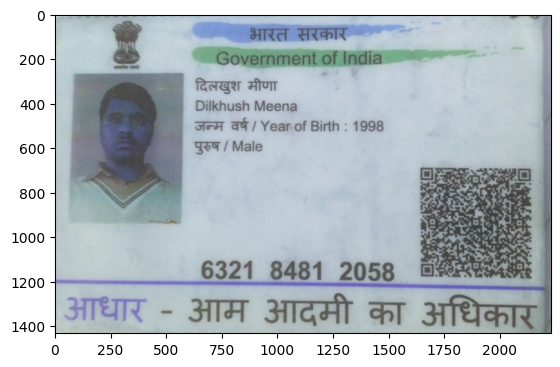

In [ ]:
plt.imshow(cv2.imread('/content/images/Aadhaar/1.jpg'))